# The 3rd Question: 
# How does the production budget affect its popularity and profit?

### Import packages

In [1]:
#import packages
import pandas as pd
import numpy as np
from numpy import int64
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data cleaning for 'tmdb_movie' dataset

In [2]:
tmdb_movie = pd.read_csv('data/tmdb.movies.csv')
print(tmdb_movie.shape)
print(tmdb_movie.isna().sum())
tmdb_movie.head()

(26517, 10)
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
#Remove the 'unnamed' column and set 'title' column as index
tmdb_movie = tmdb_movie.drop('Unnamed: 0', 1)
tmdb_movie.set_index('title', inplace=True)

In [4]:
#Drop unnecessary columns 
tmdb_movie = tmdb_movie.drop(['genre_ids', 'id', 'original_language', 'original_title'], axis=1).copy()
tmdb_movie.head()

,popularity,release_date,vote_average,vote_count
title,,,,
Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
How to Train Your Dragon,28.734,2010-03-26,7.7,7610
Iron Man 2,28.515,2010-05-07,6.8,12368
Toy Story,28.005,1995-11-22,7.9,10174
Inception,27.920,2010-07-16,8.3,22186


### Data cleaning for 'tn_budget' dataset

In [5]:
#read the data file and preview some general info about: dataset size, missing data, how it looks
tn_budget = pd.read_csv('data/tn.movie_budgets.csv')
print(tn_budget.shape)
print(tn_budget.isna().sum())
tn_budget.head()

(5782, 6)
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
#Rename 'movie' column
tn_budget = tn_budget.rename(columns={'movie': 'title'}).copy()

In [7]:
tn_budget.set_index('title', inplace=True)
tn_budget.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross
title,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"


### Re-format the release_date and choose the data for recent movies (from 2000 to 2018)

In [8]:
#change the type of 'release_date' column from object to datetime 
tmdb_movie['release_date'] = pd.to_datetime(tmdb_movie['release_date'])
print(tmdb_movie['release_date'].dtype)

datetime64[ns]


In [9]:
#Choose only recent movies: from 2000 to 2018
movies_from_2000_2018 = tmdb_movie[(tmdb_movie['release_date'] > '2000-01-01') 
                                      & (tmdb_movie['release_date'] <= '2018-12-31')].copy()
movies_from_2000_2018.head()

,popularity,release_date,vote_average,vote_count
title,,,,
Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
How to Train Your Dragon,28.734,2010-03-26,7.7,7610
Iron Man 2,28.515,2010-05-07,6.8,12368
Inception,27.920,2010-07-16,8.3,22186
Percy Jackson & the Olympians: The Lightning Thief,26.691,2010-02-11,6.1,4229


### Calculate the profit and choose the data for recent movies (from 2000 to 2018)

In [10]:
#Remove the '$' sign and comma ',' and change the type to int for production_budget and worldwide_gross columns
tn_budget['production_budget'] = tn_budget['production_budget'].str.replace('$','').str.replace(',','').astype(int64)
tn_budget['worldwide_gross'] = tn_budget['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int64)
tn_budget['domestic_gross'] = tn_budget['domestic_gross'].str.replace('$','').str.replace(',','').astype(int64)

In [11]:
#Calculate the profit from production_budget and worldwide_gross and store it to a new column named 'profit'
tn_budget['profit'] = (tn_budget['worldwide_gross'] - tn_budget['production_budget'])
tn_budget['profit'] = tn_budget['profit'].astype(int64)

In [12]:
#change the type of 'release_date' column from object to datetime 
tn_budget['release_date'] = pd.to_datetime(tn_budget['release_date'])
#Choose only recent movies: from 2000 to 2018
movies_from_2000_2018_b = tn_budget[(tn_budget['release_date'] > '2000-01-01') 
                                      & (tn_budget['release_date'] <= '2018-12-31')].copy()
movies_from_2000_2018_b.head()

,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
title,,,,,,
Avatar,1,2009-12-18,425000000,760507625,2776345279,2351345279
Pirates of the Caribbean: On Stranger Tides,2,2011-05-20,410600000,241063875,1045663875,635063875
Avengers: Age of Ultron,4,2015-05-01,330600000,459005868,1403013963,1072413963
Star Wars Ep. VIII: The Last Jedi,5,2017-12-15,317000000,620181382,1316721747,999721747
Star Wars Ep. VII: The Force Awakens,6,2015-12-18,306000000,936662225,2053311220,1747311220


### Create a new SQL database and import two existing Pandas dataframes to it

In [13]:
#Create a new SQL database
conn = sqlite3.connect('movie_info.db')
cur = conn.cursor()

In [14]:
#Create a new table 'mov_pop' in the SQL database
cur.execute('''CREATE TABLE mov_popularity(title TEXT PRIMARY KEY,
                                           popularity REAL,
                                           release_date DATE,
                                           vote_average REAL,
                                           vote_count INTEGER)''')
conn.commit()

In [15]:
#Get from Pandas DataFrame 'movie_from_2000_2018' to SQL
movies_from_2000_2018.to_sql('mov_popularity', conn, if_exists='replace')

In [16]:
#Create a new table 'mov_pro' in the SQL database
cur.execute('''CREATE TABLE mov_profit(title TEXT PRIMARY KEY,
                                       id INTEGER,
                                       release_date DATE,
                                       production_budget INTEGER,
                                       domestic_gross INTEGER,
                                       worldwide_gross INTEGER,
                                       profit INTERGER)''')
conn.commit()

In [17]:
#Get from Pandas DataFrame 'movie_from_2000_2018_b' to SQL
movies_from_2000_2018_b.to_sql('mov_profit', conn, if_exists='replace')

In [24]:
#Review the data from 'mov_popularity' table
cur.execute('''SELECT * FROM mov_popularity;''')
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [i[0] for i in cur.description]
df1.head()

,title,popularity,release_date,vote_average,vote_count
0,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19 00:00:00,7.7,10788
1,How to Train Your Dragon,28.734,2010-03-26 00:00:00,7.7,7610
2,Iron Man 2,28.515,2010-05-07 00:00:00,6.8,12368
3,Inception,27.920,2010-07-16 00:00:00,8.3,22186
4,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11 00:00:00,6.1,4229


In [25]:
#Review the data 'mov_profit' table
cur.execute('''SELECT * FROM mov_profit;''')
df2 = pd.DataFrame(cur.fetchall())
df2.columns = [i[0] for i in cur.description]
df2.head()

,title,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,Avatar,1,2009-12-18 00:00:00,425000000,760507625,2776345279,2351345279
1,Pirates of the Caribbean: On Stranger Tides,2,2011-05-20 00:00:00,410600000,241063875,1045663875,635063875
2,Avengers: Age of Ultron,4,2015-05-01 00:00:00,330600000,459005868,1403013963,1072413963
3,Star Wars Ep. VIII: The Last Jedi,5,2017-12-15 00:00:00,317000000,620181382,1316721747,999721747
4,Star Wars Ep. VII: The Force Awakens,6,2015-12-18 00:00:00,306000000,936662225,2053311220,1747311220


## Correlation between Production Budget and Popularity

In [28]:
#Connect 'mov_profit' and 'mov_popularity' tables and show the result in DataFrame
cur.execute('''SELECT mov_popularity. *, production_budget, worldwide_gross, profit
               FROM mov_profit
               JOIN mov_popularity
               ON mov_profit.title = mov_popularity.title;''')
join_info = pd.DataFrame(cur.fetchall())
join_info.columns = [i[0] for i in cur.description]
join_info.head()

,title,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,profit
0,Avatar,26.526,2009-12-18 00:00:00,7.4,18676,425000000,2776345279,2351345279
1,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20 00:00:00,6.4,8571,410600000,1045663875,635063875
2,Avengers: Age of Ultron,44.383,2015-05-01 00:00:00,7.3,13457,330600000,1403013963,1072413963
3,Avengers: Infinity War,80.773,2018-04-27 00:00:00,8.3,13948,300000000,2048134200,1748134200
4,Justice League,34.953,2017-11-17 00:00:00,6.2,7510,300000000,655945209,355945209


In [54]:
#Import the necessary package and set up 'def' functions to calculate the correlation
import math
def mean_normalize(var):
    n = len(var)
    total = sum(var)
    mean = total / n
    
    norm = []
    for element in var:
        difference = (element - mean)
        norm.append(difference)
    return norm

def dot_product(x, y):
    sum_product = 0
    for element in range(len(x)):
        product = x[element] * y[element]
        sum_product += product
    return sum_product

def correlation(var1, var2):
    
    x = mean_normalize(var1)
    y = mean_normalize(var2)
    prod = dot_product(x, y)
    
    sq_x = [i * i for i in x]
    sq_y = [i * i for i in y]
    prod2 = dot_product(sq_x, sq_y)
    corr = round((prod / math.sqrt(sum(sq_x) * sum(sq_y))), 2)
    return corr

#Calculate the correlation between Production Budget and Profit
print('Correlation value between Production Budget and Popularity: ', 
      (correlation(join_info['production_budget'], join_info['popularity'])))

Correlation value between Production Budget and Popularity:  0.57


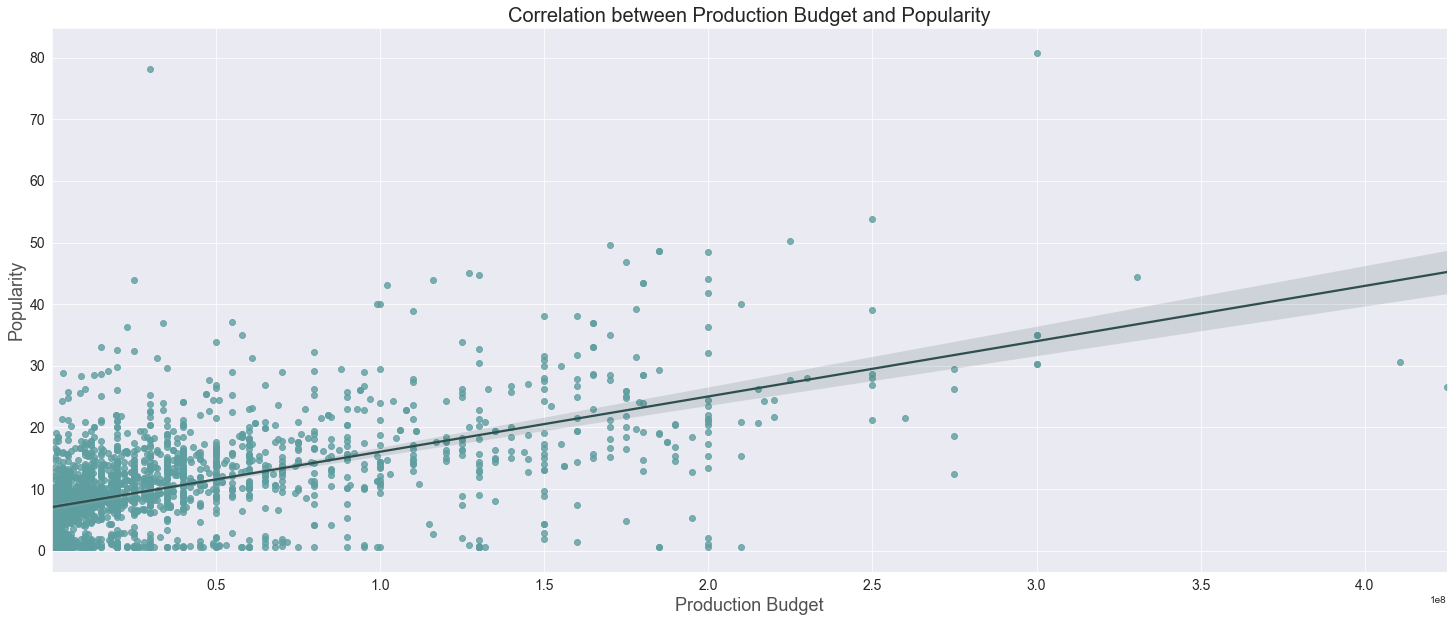

In [46]:
#Graph to show the Correlation between Production Budget and Popularity

plt.figure(figsize=(25, 10))
sns.set_style('darkgrid')
sns.regplot(x='production_budget', y='popularity', data=join_info, 
            scatter_kws={'color': 'cadetblue'}, line_kws={'color': 'darkslategray'})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Production Budget', fontsize=18, alpha=0.8)
plt.ylabel('Popularity', fontsize=18, alpha=0.8)
plt.title('Correlation between Production Budget and Popularity', fontsize=20)
plt.show()

#### Comment:
There is a positive correlation between Production Budget and Popularity

## Production Budget v.s. Profitability 

In [31]:
#Statistical information of the joined dataframe
join_info.describe()

,popularity,vote_average,vote_count,production_budget,worldwide_gross,profit
count,2202.000000,2202.000000,2202.000000,2.202000e+03,2.202000e+03,2.202000e+03
mean,10.565536,6.206312,1689.369664,3.868481e+07,1.214434e+08,8.275863e+07
std,8.226261,1.144313,2683.899420,5.258059e+07,2.258335e+08,1.862027e+08
min,0.600000,0.000000,1.000000,9.000000e+03,0.000000e+00,-1.104502e+08
25%,5.316000,5.600000,59.250000,5.000000e+06,2.693539e+06,-1.934264e+06
50%,9.395500,6.300000,606.000000,1.935000e+07,3.802305e+07,1.314742e+07
75%,14.244000,6.900000,2092.250000,4.800000e+07,1.236930e+08,7.845750e+07
max,80.773000,10.000000,22186.000000,4.250000e+08,2.776345e+09,2.351345e+09


#### Comment: 
Looking at the table above, we can see the avarage cost to make a movie and the average profit in the 'mean' row. The 'min' row can show the minimum cost to make a movie 

In [53]:
#Calculate the correlation between Production Budget and Profit
print('Correlation value between Production Budget and Profit: ', 
      (correlation(join_info['production_budget'], join_info['profit'])))

Correlation value between Production Budget and Profit:  0.69


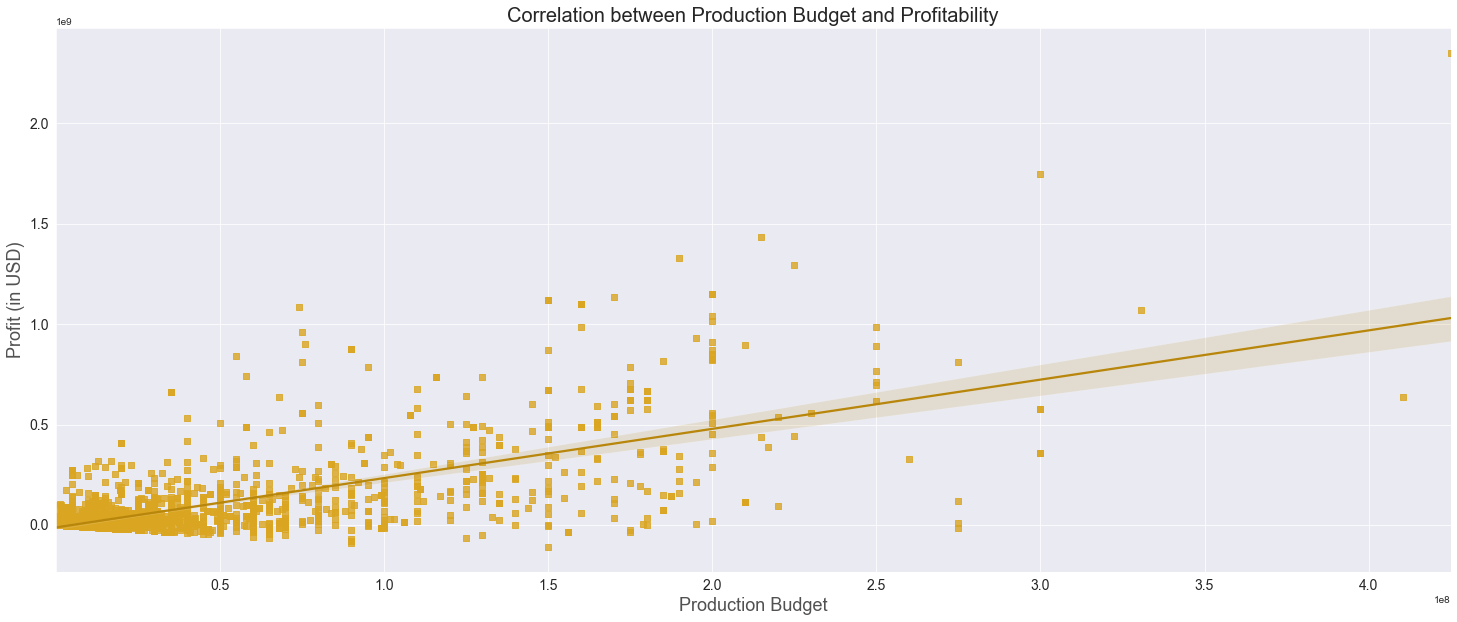

In [47]:
#Graph to show the Correlation between Production Budget and Profitability 

plt.figure(figsize=(25, 10))
sns.set_style('darkgrid')
sns.regplot(x='production_budget', y='profit', data=join_info, marker='s',
            scatter_kws={'color': 'goldenrod'}, line_kws={'color': 'darkgoldenrod'})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Production Budget', fontsize=18, alpha=0.8)
plt.ylabel('Profit (in USD)', fontsize=18, alpha=0.8)
plt.title('Correlation between Production Budget and Profitability', fontsize=20)
plt.show()

#### Comment:
There is a positive correlation between Production Budget and Profitability

# FINAL RESULTS

## Production Budget v.s. Popularity and Profitability 

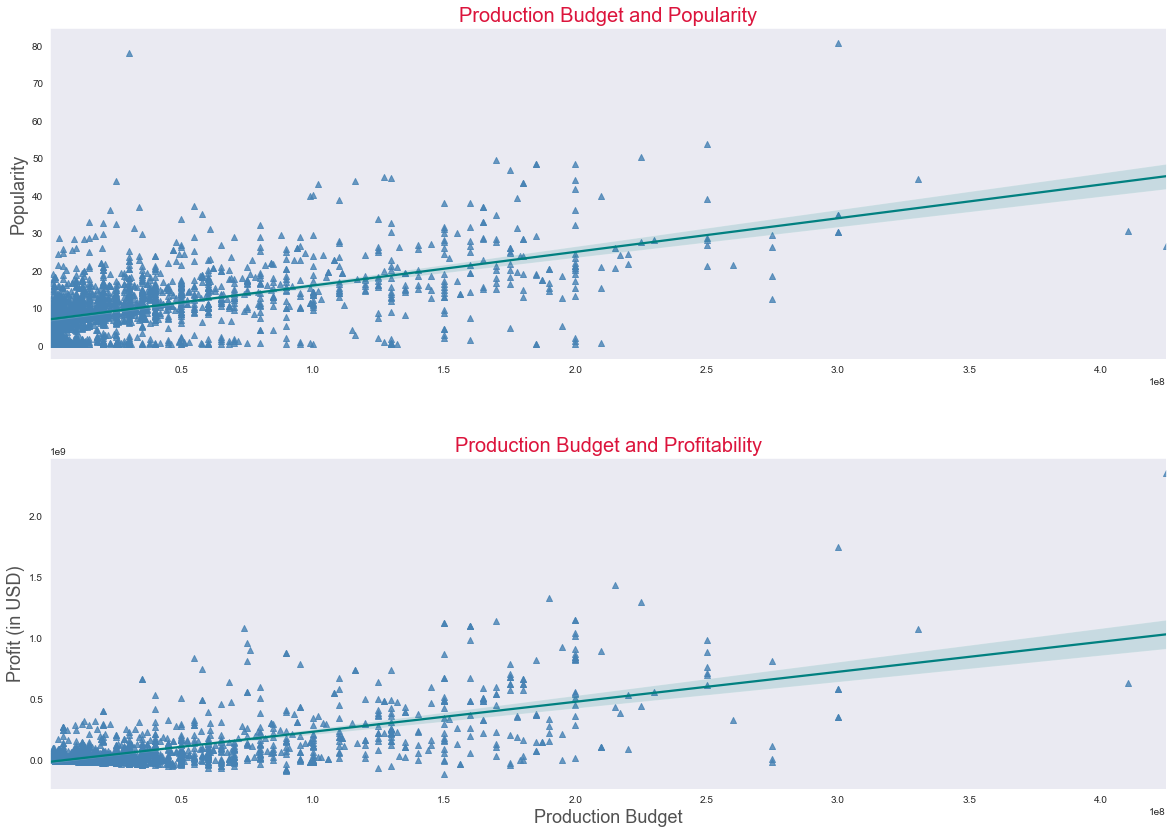

Correlation value between Production Budget and Popularity:  0.57
Correlation value between Production Budget and Profit:  0.69


In [76]:
budget_pop_pro = plt.figure(figsize=(20, 14))
b_pop = budget_pop_pro.add_subplot(211)
b_pro = budget_pop_pro.add_subplot(212)
sns.set_style('dark')

sns.regplot(x='production_budget', y='popularity', data=join_info, ax=b_pop, marker='^',
            scatter_kws={'color': 'steelblue'}, line_kws={'color': 'teal'})
sns.regplot(x='production_budget', y='profit', data=join_info, ax=b_pro, marker='^',
            scatter_kws={'color': 'steelblue'}, line_kws={'color': 'teal'})

b_pop.set_title('Production Budget and Popularity', fontsize=20, color='crimson')
b_pop.set_xlabel('')
b_pop.set_ylabel('Popularity', fontsize=18, alpha=0.8)

b_pro.set_title('Production Budget and Profitability', fontsize=20, color='crimson')
b_pro.set_xlabel('Production Budget', fontsize=18, alpha=0.8)
b_pro.set_ylabel('Profit (in USD)', fontsize=18, alpha=0.8)

plt.subplots_adjust(hspace = 0.3)

plt.show()

print('Correlation value between Production Budget and Popularity: ', 
      (correlation(join_info['production_budget'], join_info['popularity'])))
print('Correlation value between Production Budget and Profit: ', 
      (correlation(join_info['production_budget'], join_info['profit'])))